In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd

def read_csv_infolder(source_folder):
    csv_files = [f for f in listdir(source_folder) if isfile(join(source_folder, f))]
    new_list = []
    for i,v in enumerate(csv_files):
        new_dict ={}
        if 'txt' in v:
            new_dict['sub'] = pd.read_csv(r'{}\{}'.format(source_folder,v),sep = '\t',encoding = 'utf-8')
            new_dict['title'] = v
            new_list.append(new_dict)
        elif 'csv' or 'CSV' in v:
            new_dict['sub'] = pd.read_csv(r'{}\{}'.format(source_folder,v),sep = '|',encoding = 'utf-8')
            new_dict['title'] = v
            new_list.append(new_dict)
    new_df = pd.DataFrame(new_list)
    return new_df

In [35]:
udong_gender = r'.\이노베이션(미세먼지)\유동인구데이터\성연령유동'
udong_time = r'.\이노베이션(미세먼지)\유동인구데이터\시간대유동'

In [36]:
move_people=read_csv_infolder(udong_time)

In [37]:
for i in range(len(move_people)):
    if i == 0:
        a = move_people['sub'][i]
    else:
        a = a.append(move_people['sub'][i])

In [38]:
a.HDONG_CD = a.HDONG_CD.astype('str')
a.HDONG_CD = a.HDONG_CD.map(lambda x : x[:-2])
a.STD_YMD = a.STD_YMD.astype('str')
a.STD_YMD = a.STD_YMD.map(lambda x : x[:4]+'-'+x[4:6]+'-'+x[6:])

In [39]:
mi = pd.read_csv('미세먼지.csv',index_col=0)
mi = mi.rename(columns={'date_daily':'STD_DD','code':'LOC_CD'})
mi = mi.groupby('STD_DD').mean().drop(columns=['LOC_CD'])
mi = mi.reset_index()
mi.STD_DD = mi.STD_DD.astype('str')
mi.STD_DD = mi.STD_DD.map(lambda x : x[:4]+'-'+x[4:6]+'-'+x[6:])

gong = pd.read_csv('공휴일여부.csv',index_col=0)
gong = gong.rename(columns= {'date':'STD_DD'})

mi = mi.merge(gong,how='left',on='STD_DD')
mi = mi.rename(columns = {'STD_DD':'STD_YMD'})

In [40]:
a = a.merge(mi,how='left',on = 'STD_YMD')

In [42]:
a.groupby('STD_YM').mean().to_csv('해보자.csv')

In [27]:
a = a.groupby('STD_YMD').mean()

In [11]:
new_dict = {}
for i in a.columns[1:-3]:
    new_dict[i] = i[-2:]
a = a.rename(columns = new_dict)

In [13]:
a.to_csv('시간별유동인구.csv')

In [110]:
a[a.pm10>60][a.공휴일여부==0].mean(axis=0)

C:\Users\82102\Anaconda3\envs\my_python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


STD_YM    201858.965517
00          1014.020019
01           659.898697
02           485.046284
03           435.394288
04           714.257516
05          1538.980731
06          3202.606328
07          7343.677832
08          8140.286102
09          5853.676612
10          4978.533442
11          5146.757692
12          5243.634844
13          5368.731383
14          5220.538119
15          5424.735450
16          5723.962551
17          6627.187254
18          7456.683681
19          5105.515530
20          3959.318404
21          3864.555830
22          3154.450166
23          2057.599725
pm10          90.669404
pm25          52.525780
공휴일여부          0.000000
dtype: float64

C:\Users\82102\Anaconda3\envs\my_python\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\82102\Anaconda3\envs\my_python\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\82102\Anaconda3\envs\my_python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


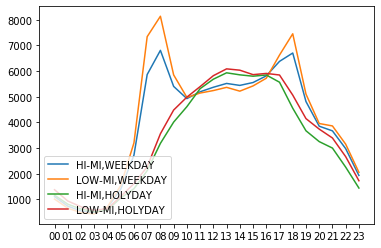

In [125]:
import numpy as np
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 

X = a[a.pm10>50 ][a.공휴일여부==0].mean(axis=0)[1:-3]
Y = a[a.pm10>60][a.공휴일여부==0].mean(axis=0)[1:-3]
Z = a[a.pm10>100][a.공휴일여부==1].mean(axis=0)[1:-3]
Q = a[a.pm10<=100][a.공휴일여부==1].mean(axis=0)[1:-3]
# Plotting functionality starts here
plt.plot(X , label="HI-MI,WEEKDAY")
plt.plot(Y , label="LOW-MI,WEEKDAY")
plt.plot(Z, label="HI-MI,HOLYDAY")
plt.plot(Q, label="LOW-MI,HOLYDAY")
plt.legend(loc='lower left')
plt.show()

In [126]:
import geopandas